In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import pandas as pd



X, _ = make_blobs(n_samples=100_000,centers=3, n_features=3)
df = pd.DataFrame(X, columns=["x1", "x2", "x3"])

# 1. Split the data
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

/home/bule/TramDag/utils/tramdag.py:251: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


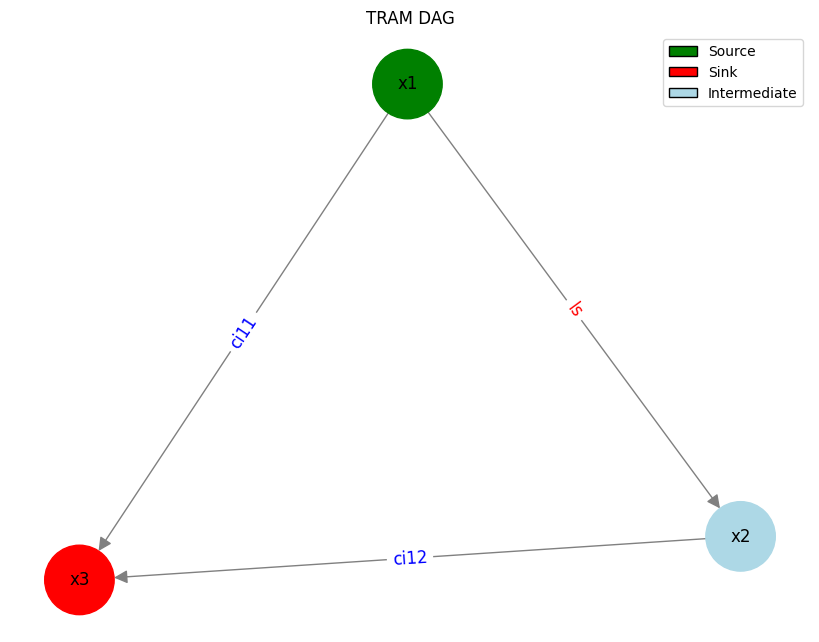

In [2]:
from utils.tramdag import TramDagConfig , TramDagModel

cfg = TramDagConfig.load("/home/bule/TramDag/dev_experiment_logs/create_configration_test/configuration.json")
cfg.plot_dag()

device='cpu'

In [4]:

td_model = TramDagModel.from_config(cfg, set_initial_weights=False,verbose=True,debug=False,device=device,initial_data = train_df) 

In [5]:
td_model.fit(train_df, val_df,
             epochs=220,batch_size=1_000,
             verbose=False,debug=False,
             device=device,
             train_mode = "multiprocess")#,

[Parallel(n_jobs=3)]: Using backend MultiprocessingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Batch computation too fast (0.07606315612792969s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.4s finished


{'x1': None, 'x2': None, 'x3': None}

[INFO] Final latent DataFrame shape: (80000, 6)


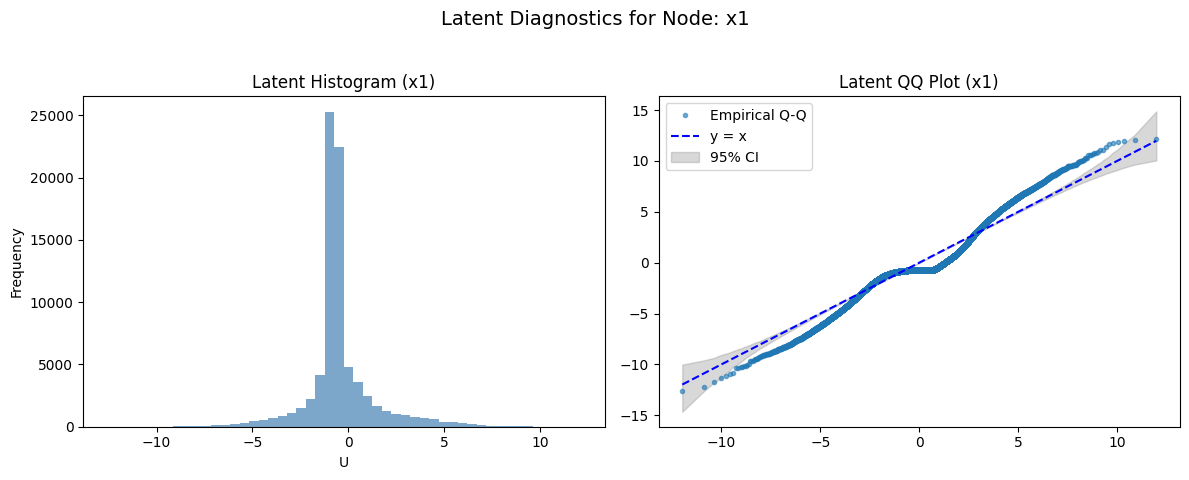

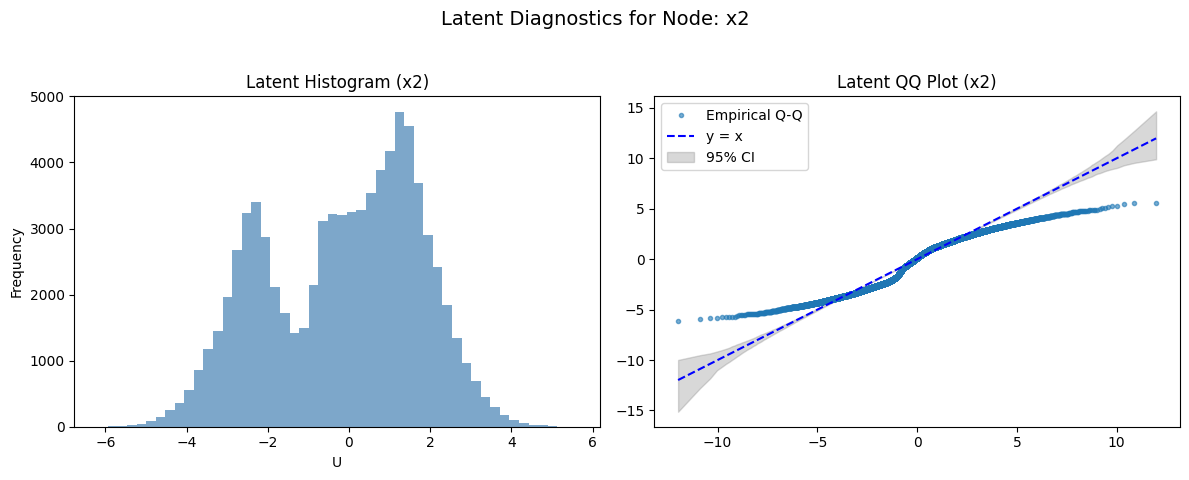

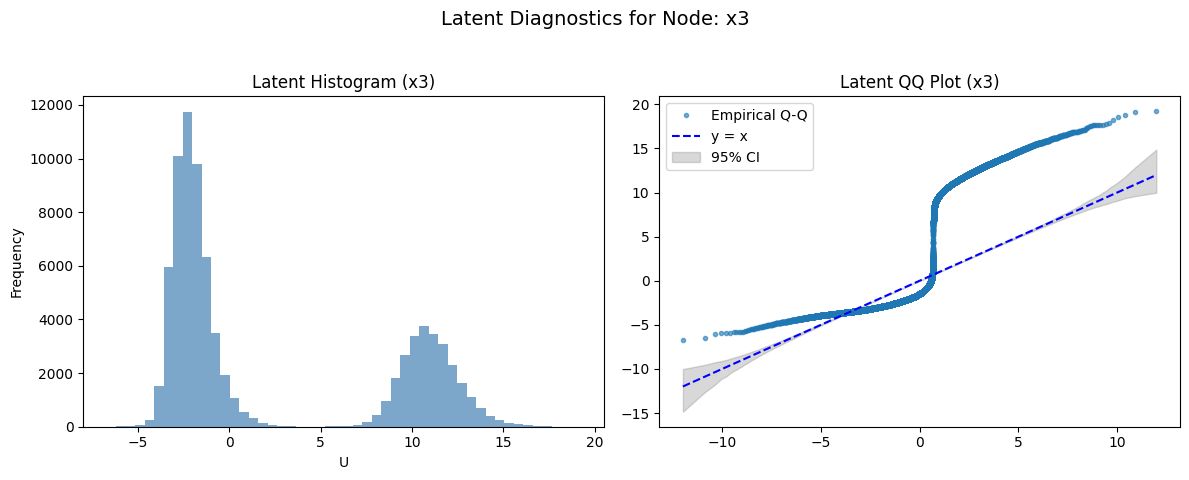

In [6]:
td_model.show_latents( train_df)

In [ ]:
latents_df = td_model.get_latent(train_df)

In [ ]:
samples, latents = td_model.sample(number_of_samples=5000)